<a href="https://colab.research.google.com/github/kkyung0131/Euron-6th-Project/blob/%EC%A1%B0%EC%8A%B9%EC%97%B0/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 39.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')


file_path =  "/content/gdrive/My Drive/EuronData/"

Mounted at /content/gdrive/


In [3]:
import pandas as pd

df = pd.read_csv(file_path + "preprocessed_review_data.csv")
df.head()

,category,reviews,keyword1,keyword2,keyword3
0,해산물요리,노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서먹었는데요 양념맛...,음식이 맛있어요,친절해요,인테리어가 멋져요
1,고기요리,지나가는데 너무 예뻐서 술집인 줄 알았는데 알고 보니까 신촌 삼겹살 맛집이더라구요 ...,음식이 맛있어요,고기 질이 좋아요,친절해요
2,중식당,협력사들과 회의 끝내고 오찬 같이했네요 간만에 오니 새로운 메뉴도 생기고 사람이 많...,음식이 맛있어요,인테리어가 멋져요,특별한 메뉴가 있어요
3,고기요리,이 리뷰는 업체로부터 무료 이용권을 제공 받은 대가로 작성한 솔직 후기입니다 우연...,음식이 맛있어요,양이 많아요,친절해요
4,한식,생방송투데이와 맛의 승부사에도 방영될 정도로 검증된 유명한 핫플매장이더라구요 테라스...,음식이 맛있어요,양이 많아요,재료가 신선해요


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from konlpy.tag import Okt, Komoran, Hannanum
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
#원핫 인코딩
le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category'])

#라벨 인코딩
le = LabelEncoder()
df['keyword1'] = le.fit_transform(df['keyword1'])
le = LabelEncoder()
df['keyword2'] = le.fit_transform(df['keyword2'])
le = LabelEncoder()
df['keyword3'] = le.fit_transform(df['keyword3'])

In [6]:
#stopwords 지정
#일단 인터넷에 있는거 하나 쓰긴 했는데 오히려 너무 많이 불용어로 처리하는거 아닌가 싶기도 하네요
#출처: https://ahnsun98.tistory.com/35#google_vignette
#예를 들어서 ~않다 라고 하면 부정의 의미니까 오히려 필요한 게 아닌지... 그런 친구들때문에 고민됩니다.
f = open(file_path + 'stopword.txt', "r")
stopwords = f.read().splitlines()
stopwords

['않다',
 '되어다',
 '되다',
 '하다',
 '어떻다',
 '이렇다',
 '이다',
 '어제',
 '매일',
 '아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼

In [7]:
4*5

20

In [22]:
#형태소 뽑기 + 불용어 제거 함수
def find_morphs(df):
  #(Okt 이용)
  okt = Okt()
  #하려고 하니까 엄청 이상하게 나오더라구요... 그래서 패키지를 변경했습니다.
  #han = Hannanum()
  X = []
  for sentence in tqdm(df):
    tokenized_sentence = okt.morphs(sentence)
    #stopword 제거
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    X.append(stopwords_removed_sentence)

  return X

In [23]:
df['processed_review'] = find_morphs(df['reviews'])

100%|██████████| 670/670 [01:25<00:00,  7.87it/s]


텍스트가 그렇게 큰 편이 아니라서 1번만 나온 단어들만 제거했습니다!

In [19]:
for sentence in df.iloc[0:5, 1]:
  print(sentence)

노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서먹었는데요 양념맛이깊이가있어서 볶음밥까지너무맛나네요퐁듀치즈에찍어먹었는데 천상의맛이네요 양도푸짐해서남은것들도 따로포장해서 사장님이챙겨주셨는데요 진짜 맛난거먹이고픈 엄마마음느꼈네용 감사드려요 쭈꾸미가 너무 먹고싶어서 온 신촌 역시 기대를 저버리지 않고 핵존맛 입니다 점심특선으로 먹었는데 가격 착하고 쭈꾸미 좋아하는 우리 여친느님께요 대만족을 하셨습니다 또한 볶음밥 하트로 해주시는데 너무 맛있고 좋아요 술도 싼데 점심이라 패스 진짜 좋아요ㅋㅋ 다음에 또올께요 집근천데 처음가봄 쭈삼 기본셋팅 홍합 콘치즈 계란까지 알차게 맛있어요 쭈꾸미삼겹 먹었는데 무난무난 맛있어요 볶음밥이 별미입니다ㅎ 계란찜두 보들거려서 맛있게 먹렀더니 직원분이 리필해쥬셨어요 처음 생겼을때부터 다녔으니까 아마 15년은 되었나봐요 이렇게 오랫동안 맛집을 유지하는건 역시나 맛이 있어서 그렇겠지요 가게 인테리어도 옛날 감성으로 정감있고 멋있어요 직원분들도 친절하고 여전히 쭈꾸미 맛있어요 국물이 마법 소스 같은데 국물 너무 얼큰하고 매콤하고 계속 끌리는 마성의 맛 요즘은 물가가 올라서 예전에는 날치알을 주셨는데 지금은 마요네즈를 주신다고 날치알도 맛있었지만 쭈꾸미가 매콤하니 마요네즈 소스를 날치알 대신 얹어 먹어도 매운맛이 중화 되어서 괜찮더라구요 반찬같은 경우는 셀프바가 있어서 직원들 안불러도 편하게 리필해서 먹을 수 있어서 그게 더 좋은것 같아요 계속 갈꺼니까 계속 장사해주세요 이번에도 잘 먹고 갑니다 ^^ 쭈꾸미가 탱글탱글하고 양도 많고 구성도 알찼어요 적당히 매콤해서 맵찔이도 맛있게 먹을 수 있었습니다 볶음밥에는 치즈랑 계란을 같이 넣고 볶아주시는데 이게 별미네요 사장님께서도 정말 친절하십니다 쭈꾸미도 크고 싱싱하고 양도 많아요 달걀찜도 무한리필이고 야채 셀프바도 있어서 푸짐하고 맛있어요 가게 컨셉이 60년대 감성이어서 타임머신타고 과거로 간것 같고 재미있어요 12년 이상 신촌맛집으로 생방송에도 방송되었어요 강추합니다 맛 있어요 추가

In [24]:
df['processed_review'][0]

['노포',
 '식당',
 '요즘',
 '인기',
 '있는',
 '곳',
 '이래서',
 '왔어요',
 '주꾸미',
 '삼겹',
 '꽃게',
 '새우',
 '사리',
 '추가',
 '해서',
 '먹었는데요',
 '양념',
 '맛',
 '깊이가있어서',
 '볶음밥',
 '너무',
 '맛',
 '요',
 '퐁듀',
 '치즈',
 '찍어',
 '먹었는데',
 '천',
 '상의',
 '맛',
 '이네',
 '요',
 '양도',
 '푸',
 '짐해',
 '서남',
 '은',
 '도',
 '따로',
 '포장',
 '해서',
 '사장',
 '님',
 '챙겨주셨는데요',
 '진짜',
 '맛',
 '난',
 '거',
 '먹이',
 '고픈',
 '엄마',
 '마음',
 '느꼈',
 '용',
 '감사',
 '드려요',
 '쭈꾸미',
 '너무',
 '먹고싶어서',
 '온',
 '신촌',
 '역시',
 '기대',
 '버리지',
 '않고',
 '핵존맛',
 '입니다',
 '점심',
 '특선',
 '먹었는데',
 '가격',
 '착하고',
 '쭈꾸미',
 '좋아하는',
 '여친',
 '느님',
 '께',
 '요',
 '대',
 '만족',
 '하셨습니다',
 '볶음밥',
 '하트',
 '해주시는데',
 '너무',
 '맛있고',
 '좋아요',
 '술',
 '도',
 '싼데',
 '점심',
 '이라',
 '패스',
 '진짜',
 '좋아요',
 'ㅋㅋ',
 '올께요',
 '집',
 '근',
 '천',
 '데',
 '처음',
 '가봄',
 '쭈삼',
 '기본',
 '셋팅',
 '홍합',
 '콘치',
 '즈',
 '계란',
 '알차게',
 '맛있어요',
 '쭈꾸미',
 '삼겹',
 '먹었는데',
 '무난',
 '무난',
 '맛있어요',
 '볶음밥',
 '별미',
 '입니다',
 'ㅎ',
 '계란찜',
 '두',
 '보',
 '들거',
 '려',
 '서',
 '맛있게',
 '먹렀더',
 '니',
 '직원',
 '분',
 '리',
 '필해',
 '쥬셨',
 '요',
 '처음',
 '생겼을',
 '다녔으

In [25]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['processed_review'])

In [26]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 20551
등장 빈도가 1번 이하인 희귀 단어의 수: 10952
단어 집합에서 희귀 단어의 비율: 53.2918106174882
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.54326755174037


5퍼센트니까 그냥 지우는 게 나을 것 같아요! 그런데 음... 애초에 단어가 많이 없으니까 넣는 게 나을 거 같기도 하구... 그런데 오히려 너무 희소한 단어면 분석만 복잡하게 할 수 있지 않을까요??

In [27]:
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 9600


In [28]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(df['processed_review'])
df['review_enc'] = tokenizer.texts_to_sequences(df['processed_review'])

리뷰의 최대 길이 : 733
리뷰의 평균 길이 : 278.53880597014927


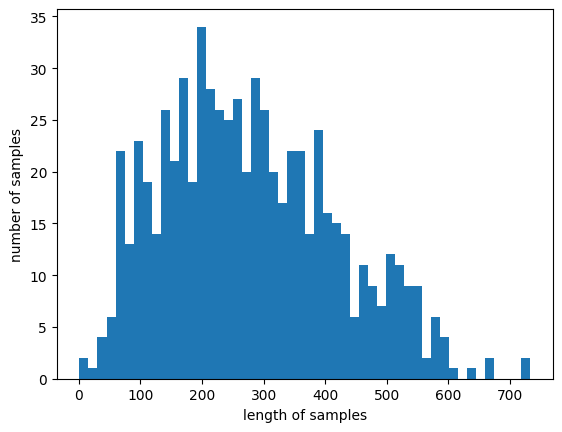

In [29]:
#리뷰 길이 히스토그램
print('리뷰의 최대 길이 :',max(len(review) for review in df['review_enc']))
print('리뷰의 평균 길이 :',sum(map(len, df['review_enc']))/len(df['review_enc']))
plt.hist([len(review) for review in df['review_enc']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [30]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [31]:
max_len = 700
below_threshold_len(max_len, df['review_enc'])

전체 샘플 중 길이가 700 이하인 샘플의 비율: 99.70149253731343


In [32]:
max_len = 600
below_threshold_len(max_len, df['review_enc'])

전체 샘플 중 길이가 600 이하인 샘플의 비율: 99.1044776119403


In [33]:
max_len = 500
below_threshold_len(max_len, df['review_enc'])

전체 샘플 중 길이가 500 이하인 샘플의 비율: 91.49253731343283


max_len = 600으로 잡는 게 가장 이상적일 것으로 보임!

In [34]:
max_len = 600
padded_sequences = pad_sequences(df['review_enc'], maxlen=max_len)

In [49]:
X_train_text, X_test_text, X_train_cat, X_test_cat, y_train, y_test = train_test_split(padded_sequences, df['category_encoded'], df['keyword2'], test_size=0.2, random_state=0)

⬆️Tokenizer 이용

TF-IDF 벡터화, Word2Vec 벡터화

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [38]:
# TF-IDF 사용
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),  #1개짜리랑 bigram
    stop_words=stopwords,  #불용어 지정
    max_df=0.95,  #95% 이상의 문서에 등장하는 단어 무시
    min_df=2,  #2개 이상의 문서에 등장하는 단어만 사용
)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['reviews'])
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())


TF-IDF Matrix:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06799041 0.         ... 0.         0.         0.        ]]


In [39]:
# Word2Vec 사용
tokenized_texts = [text.split() for text in df['reviews']]
word2vec_model = Word2Vec(tokenized_texts,
                          vector_size=100, #벡터 차원 지정
                          window=5, #앞뒤 5개 단어 고려
                          min_count=2, #최소 2개 이상 문서에서 나온 단어만 취급
                          workers=4)
word2_vectors = word2vec_model.wv

벡터화 결과 rf로 정확도 측정

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [43]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['keyword2'], test_size = 0.2, random_state = 0)

In [44]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(accuracy_score(y_test, pred))

0.291044776119403


원래 이렇게... 처참한 정확도가 나오나요...?